Associated notes in random scribbles. Aim is to look at what type of conditions lead to an improvement in ENSO forecast, or at least an increase or decrease in ENSO skill

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cftime
from xhistogram.xarray import histogram
import scipy.stats
import warnings
import time
import glob
import os
import cartopy.crs as ccrs

import sys
sys.path.append('/glade/u/home/jjeffree/ensemble-analogue-predictability/')
import predictability_tools as pt


In [43]:
client.close()

In [2]:
from dask.distributed import Client
client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/jjeffree/more_testing/proxy/8787/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/jjeffree/more_testing/proxy/8787/status,Workers: 16
Total threads: 16,Total memory: 160.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38109,Workers: 16
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/jjeffree/more_testing/proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 160.00 GiB
Comm: tcp://127.0.0.1:42799,Total threads: 1
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/jjeffree/more_testing/proxy/34351/status,Memory: 10.00 GiB
Nanny: tcp://127.0.0.1:37997,


In [3]:
models = ['CESM2-LE','ACCESS-ESM1-5','MPI-GE','MIROC6','CanESM5','IPSL-CM6A-L','MIROC-ES2L','GFDL-ES2M','MPI-CMIP6']
models.sort()

In [8]:
for model_name in models[1:]:
    model_name = model_name+'_nomean'
    model_ss = pt.get_025_ss[model_name]()

    model_ss.load()
    print(model_name)
    for m in ('10P','10P30A','10P30I','10-30P','30-10P','10P30N','10P30S'):
        analogues = xr.open_mfdataset('/glade/work/jjeffree/results/area_corr/base/detail/'+model_name+'_tos_zos/'+m+'_*.nc',decode_cf=False).chunk({'pred_SMILE_M':1}).isel(pred_SMILE_M=slice(10,15),lib_mi=slice(0,2))
        analogues = xr.decode_cf(analogues)
        assert analogues.mask.shape == (1,)
        true_init = model_ss.sel(time=analogues.init_time,SMILE_M=analogues.pred_SMILE_M)
        analogue_init = model_ss.sel(time=analogues.analogue_init_time,SMILE_M=analogues.analogue_SMILE_M).mean('M')
        mse = ((true_init-analogue_init)**2).mean(('Y','pred_SMILE_M','lib_mi'))
        variance = true_init.var(('Y','pred_SMILE_M','lib_mi'))
        analogues.close()
        print(m)
        out_data = xr.Dataset({'mse':mse,'variance':variance}).assign_coords({'mask':m}).expand_dims('mask')
        out_data.to_netcdf('/glade/derecho/scratch/jjeffree/250206_areacorr_mse/'+model_name+'_'+m+'.nc')


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 195.60 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


CESM2-LE_nomean


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30A


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30I


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10-30P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


30-10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30N


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30S


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 192.43 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


CanESM5_nomean


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30A


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30I


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10-30P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


30-10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30N


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30S


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 192.31 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


GFDL-ES2M_nomean


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30A


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30I


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10-30P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


30-10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30N


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30S


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 192.22 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


IPSL-CM6A-L_nomean


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30A


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30I


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10-30P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


30-10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30N


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30S


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 192.20 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


MIROC-ES2L_nomean


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30A


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30I


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10-30P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


30-10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30N


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30S


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 192.48 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


MIROC6_nomean


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30A


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30I


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10-30P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


30-10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30N


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30S


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 191.54 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


MPI-CMIP6_nomean


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30A


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30I


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10-30P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


30-10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30N


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30S


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 193.27 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


MPI-GE_nomean


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30A


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30I


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10-30P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


30-10P


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


10P30N
10P30S


/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/xarray/core/nputils.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


In [8]:
all_mse = {}
all_var = {}

for model_name in models:
    mse = xr.open_mfdataset(['/glade/derecho/scratch/jjeffree/250206_areacorr_mse/'+model_name+'_nomean_'+m+'.nc' for m in ('10P','10P30A','10P30I','10-30P','30-10P','10P30N','10P30S')],
                           concat_dim='mask',
                           combine='nested',
                           ).assign_coords({'mask':np.array(('10P','10P30A','10P30I','10-30P','30-10P','10P30N','10P30S',))})
    all_mse[model_name]=mse.mse

    all_var[model_name]=mse.variance


In [9]:
mean_mse = xr.zeros_like(all_mse['ACCESS-ESM1-5'])
mean_var = xr.zeros_like(all_mse['ACCESS-ESM1-5'])

for model in models:
    mean_mse+=all_mse[model]
    mean_var+=all_var[model]
mean_mse/=len(all_mse.keys())
mean_var/=len(all_mse.keys())

/glade/derecho/scratch/jjeffree/tmp/ipykernel_25392/729619857.py:26: UserWarning: Adding colorbar to a different Figure <Figure size 100x100 with 1 Axes> than <Figure size 1400x500 with 16 Axes> which fig.colorbar is called on.
  fig.colorbar(cmap,ax=axs[2,:1],label='MSE (fraction of variance)',extend='max',aspect=10,orientation='horizontal',extendfrac=0.1,pad=0.05,shrink=0.8,fraction=1)
/glade/derecho/scratch/jjeffree/tmp/ipykernel_25392/729619857.py:45: UserWarning: Adding colorbar to a different Figure <Figure size 100x100 with 1 Axes> than <Figure size 1400x500 with 17 Axes> which fig.colorbar is called on.
  fig.colorbar(cmap,ax=axs[2,1:],label='$\\Delta$MSE (fraction of variance)',extend='both',aspect=40,orientation='horizontal',extendfrac=0.1/4,pad=0.05,shrink=0.8,fraction=1)


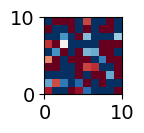

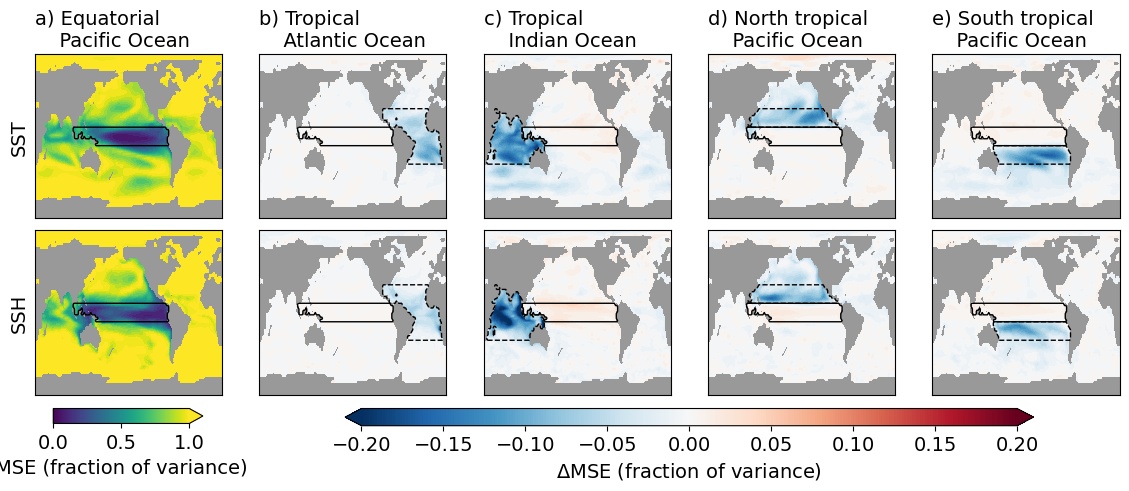

In [68]:
roll = -10

def draw_continents():
    plt.contourf(~np.isnan(pt.mask_dict['G']),levels=(0.1,1.5),colors='#999999',zorder=-100)

plt.figure(figsize=(1,1))
dummy_ax = plt.axes()


fig, axs = plt.subplots(3,5,figsize=(14,5),sharex=True,sharey=True,gridspec_kw={'height_ratios':[1]*2+[0.2]})
start_mask = '10P'
end_mask = ('10P30A','10P30I','10-30P','30-10P')

i=0
for j in range(2):
    plt.sca(axs[j,i])
    axs[j,i].set_xticks([])
    axs[j,i].set_yticks([])
    plt.contourf((mean_mse.sel(mask=start_mask)/mean_var.sel(mask='10P')).isel(var=j).roll(lon=roll,roll_coords=True),
                        levels=[-200]+list(np.linspace(0,1,25))+[200],vmin=0,vmax=1,cmap='viridis')

    plt.contour(pt.mask_dict[start_mask].roll(lon=roll,roll_coords=True),levels=(0.5,),colors=('k',),linewidths=(1,))
    draw_continents()
        
cmap = dummy_ax.pcolormesh(np.random.normal(0,1,(10,10)),vmin=0,vmax=1,cmap='viridis')
fig.colorbar(cmap,ax=axs[2,:1],label='MSE (fraction of variance)',extend='max',aspect=10,orientation='horizontal',extendfrac=0.1,pad=0.05,shrink=0.8,fraction=1)
axs[0,0].set_ylabel('tos')
axs[1,0].set_ylabel('zos')


deltaclim = 0.2
for i in range(4):
    for j in range(2):
        plt.sca(axs[j,i+1])
        axs[j,i+1].set_xticks([])
        axs[j,i+1].set_yticks([])
        plt.contourf(((mean_mse.sel(mask=end_mask[i])-mean_mse.sel(mask=start_mask))/mean_var.sel(mask='10P')).isel(var=j).roll(lon=roll,roll_coords=True),
                            levels=[-200]+list(np.linspace(-deltaclim,deltaclim,51))+[200],vmin=-deltaclim,vmax=deltaclim,cmap='RdBu_r')

        plt.contour(pt.mask_dict[start_mask].roll(lon=roll,roll_coords=True),levels=(0.5,),colors=('k',),linewidths=(1,))
        plt.contour((pt.mask_dict[end_mask[i]]-pt.mask_dict[start_mask]).roll(lon=roll,roll_coords=True),levels=(0.5,),colors=('k',),linestyles=('dashed',),linewidths=(1,))
        draw_continents()
        
cmap = dummy_ax.pcolormesh(np.random.normal(0,1,(10,10)),vmin=-deltaclim,vmax=deltaclim,cmap='RdBu_r')
fig.colorbar(cmap,ax=axs[2,1:],label='$\\Delta$MSE (fraction of variance)',extend='both',aspect=40,orientation='horizontal',extendfrac=0.1/4,pad=0.05,shrink=0.8,fraction=1)
axs[0,0].set_ylabel('SST')
axs[1,0].set_ylabel('SSH')

[axs[2,i].axis('off') for i in range(5)]

axs[0,0].set_title('a) Equatorial\n    Pacific Ocean',size=14,loc='left')
axs[0,1].set_title('b) Tropical\n    Atlantic Ocean',size=14,loc='left')
axs[0,2].set_title('c) Tropical\n    Indian Ocean',size=14,loc='left')
axs[0,3].set_title('d) North tropical\n    Pacific Ocean',size=14,loc='left')
axs[0,4].set_title('e) South tropical\n    Pacific Ocean',size=14,loc='left')

plt.subplots_adjust(hspace=0.1)
#plt.suptitle('multimodel mean (relative to first error)')
plt.savefig('figures/areacorr_init_mse_change.pdf',bbox_inches='tight',pad_inches=0.2)

In [19]:
mean_mse.lon.roll(lon=roll)

<xarray.DataArray 'lon' (lon: 144)> Size: 1kB
array([ 26.25,  28.75,  31.25,  33.75,  36.25,  38.75,  41.25,  43.75,  46.25,
        48.75,  51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,  68.75,
        71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75,  91.25,
        93.75,  96.25,  98.75, 101.25, 103.75, 106.25, 108.75, 111.25, 113.75,
       116.25, 118.75, 121.25, 123.75, 126.25, 128.75, 131.25, 133.75, 136.25,
       138.75, 141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25, 158.75,
       161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75, 181.25,
       183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75, 201.25, 203.75,
       206.25, 208.75, 211.25, 213.75, 216.25, 218.75, 221.25, 223.75, 226.25,
       228.75, 231.25, 233.75, 236.25, 238.75, 241.25, 243.75, 246.25, 248.75,
       251.25, 253.75, 256.25, 258.75, 261.25, 263.75, 266.25, 268.75, 271.25,
       273.75, 276.25, 278.75, 281.25, 283.75, 286.25, 288.75, 291.25, 293.75,
       296.25, 298.75, 301.25, 303.75, 306.25, 308.75, 311.25, 313.75, 316.25,
       318.75, 321.25, 323.75, 326.25, 328.75, 331.25, 333.75, 336.25, 338.75,
       341.25, 343.75, 346.25, 348.75, 351.25, 353.75, 356.25, 358.75,   1.25,
         3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,  21.25,  23.75])
Coordinates:
  * lon      (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

/glade/derecho/scratch/jjeffree/tmp/ipykernel_9005/1404999844.py:32: UserWarning: Adding colorbar to a different Figure <Figure size 100x100 with 1 Axes> than <Figure size 1600x400 with 11 Axes> which fig.colorbar is called on.
  fig.colorbar(cmap,ax=axs[:,1],label='MSE (fraction of variance)',extend='max',aspect=20,orientation='vertical',extendfrac=0.1,pad=0.05,shrink=0.8,fraction=1)
/glade/derecho/scratch/jjeffree/tmp/ipykernel_9005/1404999844.py:50: UserWarning: Adding colorbar to a different Figure <Figure size 100x100 with 1 Axes> than <Figure size 1600x400 with 12 Axes> which fig.colorbar is called on.
  fig.colorbar(cmap,ax=axs[:,4],label='$\\Delta$MSE (fraction of variance)',extend='both',aspect=20,orientation='vertical',extendfrac=0.1/4,pad=0.05,shrink=0.8,fraction=1)


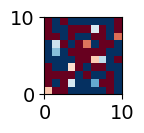

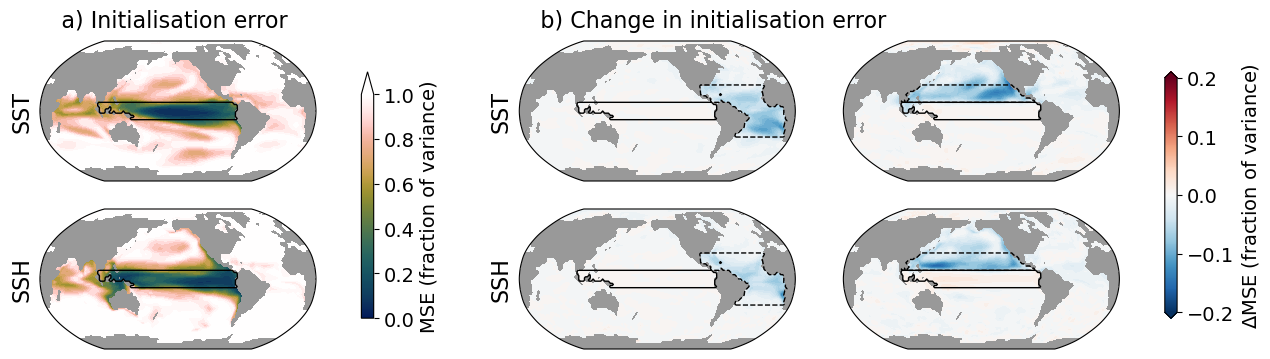

In [47]:
### POSTER VERSION
import cmcrameri.cm as cmc
roll = -10
ccrc_kwargs = {'transform':ccrs.PlateCarree()}
lon = ((pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lon-25)%360)+25-360
lat = pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lat

def draw_continents():
    plt.contourf(lon,lat,~np.isnan(pt.mask_dict['G']),levels=(0.1,1.5),colors='#999999',zorder=-100,**ccrc_kwargs)

plt.figure(figsize=(1,1))
dummy_ax = plt.axes()


fig, axs = plt.subplots(2,5,figsize=(16,4),sharex=True,sharey=True,gridspec_kw={'height_ratios':[1]*2,'width_ratios':[1,0.4,1,1,0.4]},subplot_kw={'projection': ccrs.Robinson(central_longitude=205)})
start_mask = '10P'
end_mask = ('10P30A','10-30P')

i=0
for j in range(2):
    plt.sca(axs[j,i])
    axs[j,i].set_xticks([])
    axs[j,i].set_yticks([])
    plt.contourf(lon,lat,(mean_mse.sel(mask=start_mask)/mean_var.sel(mask='10P')).isel(var=j).roll(lon=roll,roll_coords=True),
                        levels=[-200]+list(np.linspace(0,1,25))+[200],vmin=0,vmax=1,cmap='cmc.batlowW',**ccrc_kwargs)

    plt.contour(lon,lat,pt.mask_dict[start_mask].roll(lon=roll,roll_coords=True),levels=(0.5,),colors=('k',),linewidths=(1,),**ccrc_kwargs)
    draw_continents()
        
cmap = dummy_ax.pcolormesh(np.random.normal(0,1,(10,10)),vmin=0,vmax=1,cmap='cmc.batlowW')
[axs[i,1].axis('off') for i in range(2)]
fig.colorbar(cmap,ax=axs[:,1],label='MSE (fraction of variance)',extend='max',aspect=20,orientation='vertical',extendfrac=0.1,pad=0.05,shrink=0.8,fraction=1)


deltaclim = 0.2
for i in range(2):
    for j in range(2):
        plt.sca(axs[j,i+2])
        axs[j,i+2].set_xticks([])
        axs[j,i+2].set_yticks([])
        plt.contourf(lon,lat,((mean_mse.sel(mask=end_mask[i])-mean_mse.sel(mask=start_mask))/mean_var.sel(mask='10P')).isel(var=j).roll(lon=roll,roll_coords=True),
                            levels=[-200]+list(np.linspace(-deltaclim,deltaclim,51))+[200],vmin=-deltaclim,vmax=deltaclim,cmap='RdBu_r',**ccrc_kwargs)

        plt.contour(lon,lat,pt.mask_dict[start_mask].roll(lon=roll,roll_coords=True),levels=(0.5,),colors=('k',),linewidths=(1,),**ccrc_kwargs)
        plt.contour(lon,lat,(pt.mask_dict[end_mask[i]]-pt.mask_dict[start_mask]).roll(lon=roll,roll_coords=True),levels=(0.5,),colors=('k',),linestyles=('dashed',),linewidths=(1,),**ccrc_kwargs)
        draw_continents()
        
cmap = dummy_ax.pcolormesh(np.random.normal(0,1,(10,10)),vmin=-deltaclim,vmax=deltaclim,cmap='RdBu_r')
[axs[i,4].axis('off') for i in range(2)]
fig.colorbar(cmap,ax=axs[:,4],label='$\\Delta$MSE (fraction of variance)',extend='both',aspect=20,orientation='vertical',extendfrac=0.1/4,pad=0.05,shrink=0.8,fraction=1)
axs[0,0].set_ylabel('SST',labelpad=5,fontsize=16)
axs[1,0].set_ylabel('SSH',labelpad=5,fontsize=16)
axs[0,2].set_ylabel('SST',labelpad=5,fontsize=16)
axs[1,2].set_ylabel('SSH',labelpad=5,fontsize=16)



axs[0,0].set_title('   a) Initialisation error',size=16,loc='left',pad=10)
axs[0,2].set_title('   b) Change in initialisation error',size=16,loc='left',pad=10)
# axs[0,2].set_title('c) Tropical\n    Indian Ocean',size=14,loc='left')
# axs[0,3].set_title('d) North tropical\n    Pacific Ocean',size=14,loc='left')
# axs[0,4].set_title('e) South tropical\n    Pacific Ocean',size=14,loc='left')

# plt.subplots_adjust(hspace=0.1)
plt.savefig('figures/wyrtki_areacorr_init_mse_change_batlowW.pdf',bbox_inches='tight',pad_inches=0.2)

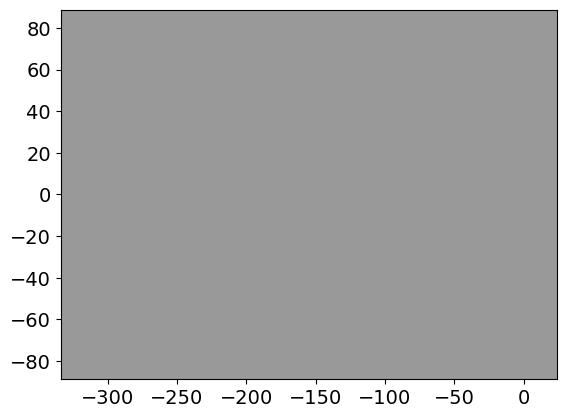

In [23]:
draw_continents()

/glade/derecho/scratch/jjeffree/tmp/ipykernel_25392/4003322783.py:24: UserWarning: Adding colorbar to a different Figure <Figure size 100x100 with 1 Axes> than <Figure size 1400x500 with 16 Axes> which fig.colorbar is called on.
  fig.colorbar(cmap,ax=axs[2,:1],label='MSE (fraction of variance)',extend='max',aspect=10,orientation='horizontal',extendfrac=0.1,pad=0.05,shrink=0.8,fraction=1)
/glade/derecho/scratch/jjeffree/tmp/ipykernel_25392/4003322783.py:43: UserWarning: Adding colorbar to a different Figure <Figure size 100x100 with 1 Axes> than <Figure size 1400x500 with 17 Axes> which fig.colorbar is called on.
  fig.colorbar(cmap,ax=axs[2,1:],label='$\\Delta$MSE (fraction of variance)',extend='both',aspect=40,orientation='horizontal',extendfrac=0.1/4,pad=0.05,shrink=0.8,fraction=1)


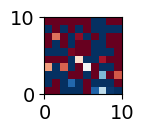

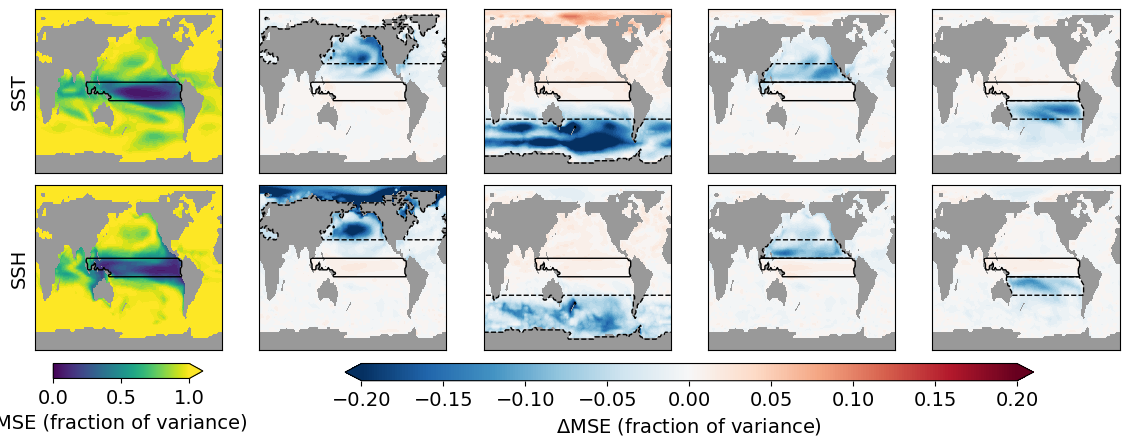

In [59]:
def draw_continents():
    plt.contourf(~np.isnan(pt.mask_dict['G']),levels=(0.1,1.5),colors='#999999',zorder=-100)

plt.figure(figsize=(1,1))
dummy_ax = plt.axes()


fig, axs = plt.subplots(3,5,figsize=(14,5),sharex=True,sharey=True,gridspec_kw={'height_ratios':[1]*2+[0.2]})
start_mask = '10P'
end_mask = ('10P30N','10P30S','10-30P','30-10P')

i=0
for j in range(2):
    plt.sca(axs[j,i])
    axs[j,i].set_xticks([])
    axs[j,i].set_yticks([])
    plt.contourf((mean_mse.sel(mask=start_mask)/mean_var.sel(mask='10P')).isel(var=j),
                        levels=[-200]+list(np.linspace(0,1,25))+[200],vmin=0,vmax=1,cmap='viridis')

    plt.contour(pt.mask_dict[start_mask],levels=(0.5,),colors=('k',),linewidths=(1,))
    draw_continents()
        
cmap = dummy_ax.pcolormesh(np.random.normal(0,1,(10,10)),vmin=0,vmax=1,cmap='viridis')
fig.colorbar(cmap,ax=axs[2,:1],label='MSE (fraction of variance)',extend='max',aspect=10,orientation='horizontal',extendfrac=0.1,pad=0.05,shrink=0.8,fraction=1)
axs[0,0].set_ylabel('tos')
axs[1,0].set_ylabel('zos')


deltaclim = 0.2
for i in range(4):
    for j in range(2):
        plt.sca(axs[j,i+1])
        axs[j,i+1].set_xticks([])
        axs[j,i+1].set_yticks([])
        plt.contourf(((mean_mse.sel(mask=end_mask[i])-mean_mse.sel(mask=start_mask))/mean_var.sel(mask='10P')).isel(var=j),
                            levels=[-200]+list(np.linspace(-deltaclim,deltaclim,51))+[200],vmin=-deltaclim,vmax=deltaclim,cmap='RdBu_r')

        plt.contour(pt.mask_dict[start_mask],levels=(0.5,),colors=('k',),linewidths=(1,))
        plt.contour(pt.mask_dict[end_mask[i]]-pt.mask_dict[start_mask],levels=(0.5,),colors=('k',),linestyles=('dashed',),linewidths=(1,))
        draw_continents()
        
cmap = dummy_ax.pcolormesh(np.random.normal(0,1,(10,10)),vmin=-deltaclim,vmax=deltaclim,cmap='RdBu_r')
fig.colorbar(cmap,ax=axs[2,1:],label='$\\Delta$MSE (fraction of variance)',extend='both',aspect=40,orientation='horizontal',extendfrac=0.1/4,pad=0.05,shrink=0.8,fraction=1)
axs[0,0].set_ylabel('SST')
axs[1,0].set_ylabel('SSH')

[axs[2,i].axis('off') for i in range(5)]

plt.subplots_adjust(hspace=0.1)
plt.savefig('figures/areacorr_init_mse_change_poles.pdf',bbox_inches='tight',pad_inches=0.2)

## Making some example analogues

In [5]:
model_name = 'CESM2-LE_nomean'
m = '10P'
analogues = xr.open_mfdataset('/glade/work/jjeffree/results/area_corr/base/detail/'+model_name+'_tos_zos/'+m+'_I7_L6_*.nc',decode_cf=False).chunk({'pred_SMILE_M':1}).isel(pred_SMILE_M=0,lib_mi=1)
analogues = xr.decode_cf(analogues)

In [6]:
xr.open_mfdataset('/glade/work/jjeffree/results/area_corr/base/detail/'+model_name+'_tos_zos/'+m+'_I7_L6_*.nc',decode_cf=False).pred_SMILE_M.load()

<xarray.DataArray 'pred_SMILE_M' (pred_SMILE_M: 100)> Size: 3kB
array(['1001.001', '1021.002', '1041.003', '1061.004', '1081.005', '1101.006',
       '1121.007', '1141.008', '1161.009', '1181.010', '1231.001', '1231.002',
       '1231.003', '1231.004', '1231.005', '1231.006', '1231.007', '1231.008',
       '1231.009', '1231.010', '1251.001', '1251.002', '1251.003', '1251.004',
       '1251.005', '1251.006', '1251.007', '1251.008', '1251.009', '1251.010',
       '1281.001', '1281.002', '1281.003', '1281.004', '1281.005', '1281.006',
       '1281.007', '1281.008', '1281.009', '1281.010', '1301.001', '1301.002',
       '1301.003', '1301.004', '1301.005', '1301.006', '1301.007', '1301.008',
       '1301.009', '1301.010', '1011.001', '1031.002', '1051.003', '1071.004',
       '1091.005', '1111.006', '1131.007', '1151.008', '1171.009', '1191.010',
       '1231.011', '1231.012', '1231.013', '1231.014', '1231.015', '1231.016',
       '1231.017', '1231.018', '1231.019', '1231.020', '1251.011', '1251.012',
       '1251.013', '1251.014', '1251.015', '1251.016', '1251.017', '1251.018',
       '1251.019', '1251.020', '1281.011', '1281.012', '1281.013', '1281.014',
       '1281.015', '1281.016', '1281.017', '1281.018', '1281.019', '1281.020',
       '1301.011', '1301.012', '1301.013', '1301.014', '1301.015', '1301.016',
       '1301.017', '1301.018', '1301.019', '1301.020'], dtype='<U8')
Coordinates:
  * pred_SMILE_M  (pred_SMILE_M) <U8 3kB '1001.001' '1021.002' ... '1301.020'

In [3]:
model_ss = pt.get_025_ss['CESM2-LE_nomean']()
small_ss = model_ss.isel(SMILE_M=slice(0,10))

In [4]:
small_ss.load()

/glade/work/jjeffree/conda-envs/jj_default2/lib/python3.12/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 192.94 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


<xarray.DataArray (var: 2, SMILE_M: 10, time: 1199, lat: 72, lon: 144)> Size: 2GB
array([[[[[            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          ...,
          [-6.33887887e-03, -6.75639987e-03, -6.75972819e-03, ...,
           -6.74524665e-03, -6.80752039e-03, -6.24863744e-03],
          [-7.38565087e-03, -8.00765276e-03, -8.26600432e-03, ...,
           -7.11640716e-03, -7.15851188e-03, -7.26141930e-03],
          [-4.50797677e-03, -4.53762770e-03, -4.67048407e-03, ...,
           -4.26181912e-03, -4.39949274e-03, -4.44159269e-03]],

         [[            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
...
          [ 2.51196628e-02,  2.54976703e-02,  2.58368083e-02, ...,
            2.21611712e-02,  2.36290400e-02,  2.47542682e-02],
          [ 1.82046618e-02,  1.78078242e-02,  1.61070132e-02, ...,
            1.75484210e-02,  1.84012141e-02,  1.75515498e-02],
          [ 8.74523191e-03,  8.95151739e-03,  8.54079618e-03, ...,
            7.56142149e-03,  7.24387655e-03,  7.68390531e-03]],

         [[            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          ...,
          [ 3.28670602e-02,  3.27682389e-02,  3.32709092e-02, ...,
            3.10488862e-02,  3.24585366e-02,  3.25921296e-02],
          [ 2.23656678e-02,  2.15407845e-02,  1.95906388e-02, ...,
            2.16606728e-02,  2.26582040e-02,  2.16190415e-02],
          [ 1.27428605e-02,  1.29523412e-02,  1.23663133e-02, ...,
            1.16581303e-02,  1.11193353e-02,  1.15854508e-02]]]]])
Coordinates:
  * lon      (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 576B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * time     (time) object 10kB 1850-01-01 00:00:00 ... 1949-11-01 00:00:00
  * var      (var) <U3 24B 'tos' 'zos'
  * SMILE_M  (SMILE_M) <U8 320B '1001.001' '1021.002' ... '1161.009' '1181.010'
    month    (time) int64 10kB 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11

In [6]:
ref_y = 15

In [8]:
new_M_names = {}
for i,k in enumerate(small_ss.SMILE_M):
    new_M_names[str(k.data)] = i

Text(0.5, 1.0, 'Target initialisation: July 1870\nEnsemble member 1')

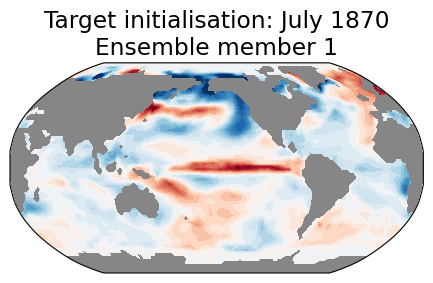

In [12]:
fig, axs = plt.subplots(1,1,figsize=(16/3,4.5),subplot_kw={'projection': ccrs.Robinson(central_longitude=205)})
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ccrc_kwargs = {'transform':ccrs.PlateCarree()}
#fig2 = plt.figure(figsize=(1,1))
#other_ax = plt.axes()
#plt.sca(ax)
lon = ((pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lon-25)%360)+25-360
lat = pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lat

init = analogues.isel(Y=ref_y).load()
plt.contourf(lon,lat,xr.ones_like(pt.mask_dict['10P']),cmap='Greys',vmin=0,vmax=1.8,**ccrc_kwargs
            )
plt.contourf(lon,lat,small_ss.sel(SMILE_M=init.pred_SMILE_M,time=init.init_time,var='tos').roll(lon=-10),
             vmin=-2,vmax=2,levels=[-100]+list(np.linspace(-2,2,25))+[100],cmap='RdBu',**ccrc_kwargs)
#plt.contour(lon,lat,pt.mask_dict['10P'].roll(lon=-10),levels=(0.5,),colors=('k',),linewidths=(1,),**ccrc_kwargs)


plt.title('Target initialisation: July '+str(init.init_time.data)[:4]+'\nEnsemble member '+str(int(str(init.pred_SMILE_M.data)[-3:])))

Text(0.5, 1.0, 'Verification: Jan 1871\nEnsemble member 1')

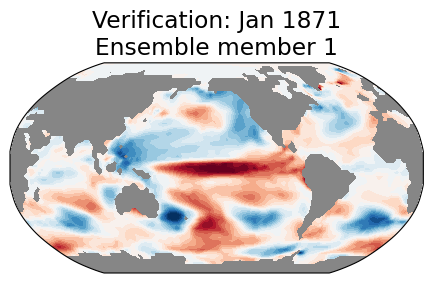

In [13]:
fig, axs = plt.subplots(1,1,figsize=(16/3,4.5),subplot_kw={'projection': ccrs.Robinson(central_longitude=205)})
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ccrc_kwargs = {'transform':ccrs.PlateCarree()}
#fig2 = plt.figure(figsize=(1,1))
#other_ax = plt.axes()
#plt.sca(ax)
lon = ((pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lon-25)%360)+25-360
lat = pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lat

init = analogues.isel(Y=ref_y).load()
plt.contourf(lon,lat,xr.ones_like(pt.mask_dict['10P']),cmap='Greys',vmin=0,vmax=1.8,**ccrc_kwargs
            )
plt.contourf(lon,lat,small_ss.shift(time=-6).sel(SMILE_M=init.pred_SMILE_M,time=init.init_time,var='tos').roll(lon=-10),
             vmin=-2,vmax=2,levels=[-100]+list(np.linspace(-2,2,25))+[100],cmap='RdBu',**ccrc_kwargs)
#plt.contour(lon,lat,pt.mask_dict['10P'].roll(lon=-10),levels=(0.5,),colors=('k',),linewidths=(1,),**ccrc_kwargs)


plt.title('Verification: Jan '+str(int(str(init.init_time.data)[:4])+1)+'\nEnsemble member '+str(int(str(init.pred_SMILE_M.data)[-3:])))

In [17]:
str(init.pred_SMILE_M.data)

'1001.001'

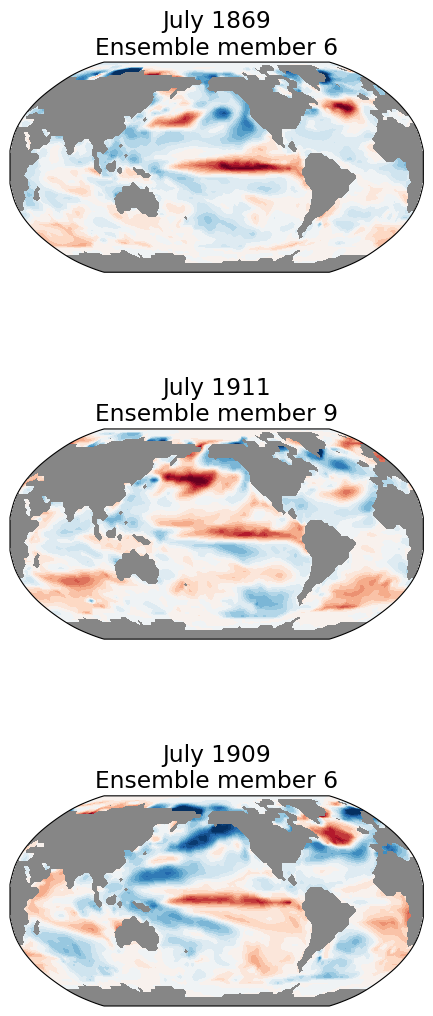

In [18]:
fig, axs = plt.subplots(3,1,figsize=(16/3,4.5*3),subplot_kw={'projection': ccrs.Robinson(central_longitude=205)})
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ccrc_kwargs = {'transform':ccrs.PlateCarree()}
#fig2 = plt.figure(figsize=(1,1))
#other_ax = plt.axes()
#plt.sca(ax)
lon = ((pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lon-25)%360)+25-360
lat = pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lat

for i in range(0,6,2):
    plt.sca(axs[i//2])
    init = analogues.isel(M=i,Y=ref_y).load()
    plt.contourf(lon,lat,xr.ones_like(pt.mask_dict['10P']),cmap='Greys',vmin=0,vmax=1.8,**ccrc_kwargs
                )
    plt.contourf(lon,lat,small_ss.sel(SMILE_M=init.analogue_SMILE_M,time=init.analogue_init_time,var='tos').roll(lon=-10),
                 vmin=-2,vmax=2,levels=[-100]+list(np.linspace(-2,2,25))+[100],cmap='RdBu',**ccrc_kwargs)
   # plt.contour(lon,lat,pt.mask_dict['10P'].roll(lon=-10),levels=(0.5,),colors=('k',),linewidths=(1,),**ccrc_kwargs)
    
    
    plt.title('July '+str(init.analogue_init_time.data)[:4]+'\nEnsemble member '+str(int(str(init.analogue_SMILE_M.data)[-3:])))

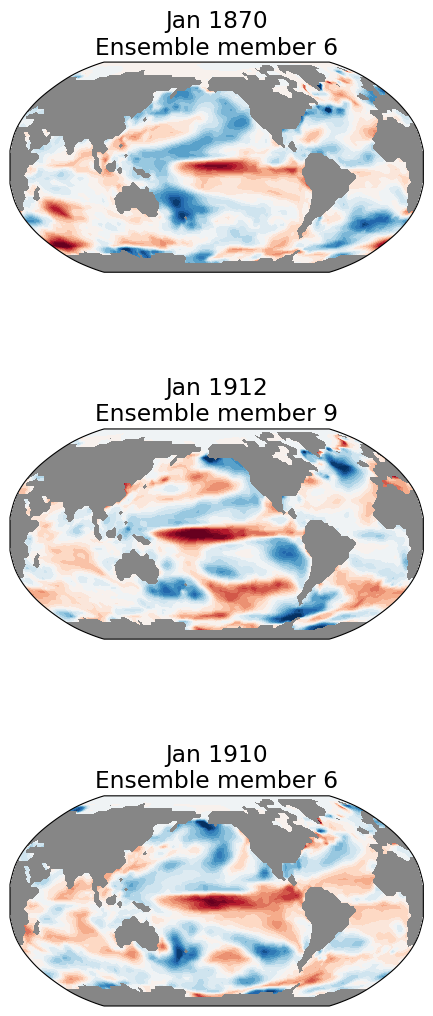

In [19]:
fig, axs = plt.subplots(3,1,figsize=(16/3,4.5*3),subplot_kw={'projection': ccrs.Robinson(central_longitude=205)})
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ccrc_kwargs = {'transform':ccrs.PlateCarree()}
#fig2 = plt.figure(figsize=(1,1))
#other_ax = plt.axes()
#plt.sca(ax)
lon = ((pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lon-25)%360)+25-360
lat = pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lat

for i in range(0,6,2):
    plt.sca(axs[i//2])
    init = analogues.isel(M=i,Y=ref_y).load()
    plt.contourf(lon,lat,xr.ones_like(pt.mask_dict['10P']),cmap='Greys',vmin=0,vmax=1.8,**ccrc_kwargs
                )
    plt.contourf(lon,lat,small_ss.shift(time=-6).sel(SMILE_M=init.analogue_SMILE_M,time=init.analogue_init_time,var='tos').roll(lon=-10),
                 vmin=-2,vmax=2,levels=[-100]+list(np.linspace(-2,2,25))+[100],cmap='RdBu',**ccrc_kwargs)
    #plt.contour(lon,lat,pt.mask_dict['10P'].roll(lon=-10),levels=(0.5,),colors=('k',),linewidths=(1,),**ccrc_kwargs)
    
    
    plt.title('Jan '+str(int(str(init.analogue_init_time.data)[:4])+1)+'\nEnsemble member '+str(int(str(init.analogue_SMILE_M.data)[-3:])))

Text(0.5, 1.0, 'Analogue forecast')

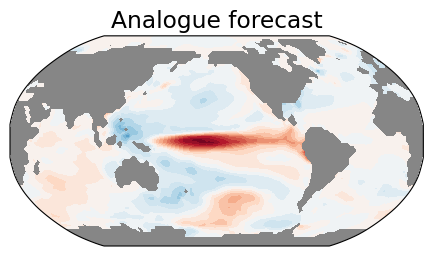

In [44]:
fig, axs = plt.subplots(1,1,figsize=(16/3,4.5),subplot_kw={'projection': ccrs.Robinson(central_longitude=205)})
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ccrc_kwargs = {'transform':ccrs.PlateCarree()}
#fig2 = plt.figure(figsize=(1,1))
#other_ax = plt.axes()
#plt.sca(ax)
lon = ((pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lon-25)%360)+25-360
lat = pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lat


plt.sca(axs)
init = analogues.isel(Y=ref_y).load()
plt.contourf(lon,lat,xr.ones_like(pt.mask_dict['10P']),cmap='Greys',vmin=0,vmax=1.8,**ccrc_kwargs
            )
cbar = plt.contourf(lon,lat,small_ss.shift(time=-6).sel(SMILE_M=init.analogue_SMILE_M,time=init.analogue_init_time,var='tos').roll(lon=-10).mean('M'),
             vmin=-2,vmax=2,levels=[-100]+list(np.linspace(-2,2,25))+[100],cmap='RdBu',**ccrc_kwargs)
#plt.contour(lon,lat,pt.mask_dict['10P'].roll(lon=-10),levels=(0.5,),colors=('k',),linewidths=(1,),**ccrc_kwargs)


plt.title('Analogue forecast')

/glade/derecho/scratch/jjeffree/tmp/ipykernel_47167/2787343229.py:4: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 1 Axes> than <Figure size 1600x100 with 2 Axes> which fig.colorbar is called on.
  fig.colorbar(cbar,ax=axs,fraction=1,aspect=60,orientation='horizontal',extend='both',label='SST anomaly (°C)')


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

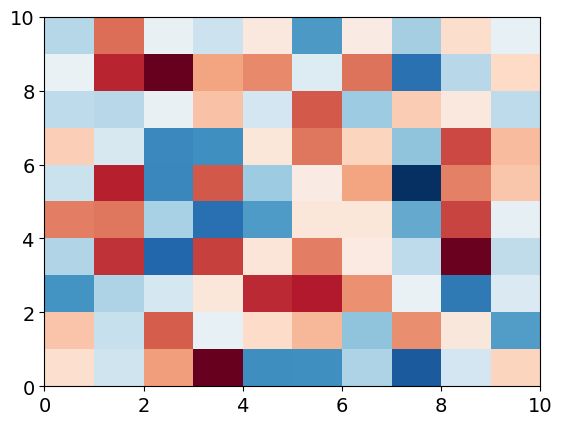

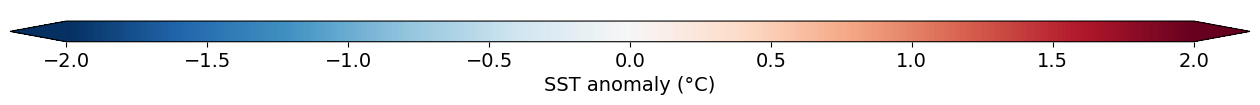

In [59]:
cbar=plt.pcolormesh(np.random.normal(0,1,(10,10)),vmin=-2,vmax=2,cmap='RdBu_r')

fig, axs = plt.subplots(1,1,figsize=(16,1))
fig.colorbar(cbar,ax=axs,fraction=1,aspect=60,orientation='horizontal',extend='both',label='SST anomaly (°C)')
axs.axis('off')

## Snuggleplots

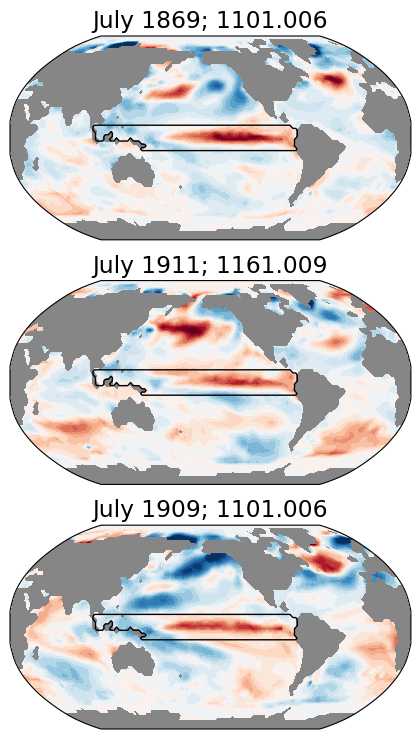

In [67]:
fig, axs = plt.subplots(3,1,figsize=(16/3,3*3),subplot_kw={'projection': ccrs.Robinson(central_longitude=205)})
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ccrc_kwargs = {'transform':ccrs.PlateCarree()}
#fig2 = plt.figure(figsize=(1,1))
#other_ax = plt.axes()
#plt.sca(ax)
lon = ((pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lon-25)%360)+25-360
lat = pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lat

for i in range(0,6,2):
    plt.sca(axs[i//2])
    init = analogues.isel(M=i,Y=ref_y).load()
    plt.contourf(lon,lat,xr.ones_like(pt.mask_dict['10P']),cmap='Greys',vmin=0,vmax=1.8,**ccrc_kwargs
                )
    plt.contourf(lon,lat,small_ss.sel(SMILE_M=init.analogue_SMILE_M,time=init.analogue_init_time,var='tos').roll(lon=-10),
                 vmin=-2,vmax=2,levels=[-100]+list(np.linspace(-2,2,25))+[100],cmap='RdBu',**ccrc_kwargs)
    plt.contour(lon,lat,pt.mask_dict['10P'].roll(lon=-10),levels=(0.5,),colors=('k',),linewidths=(1,),**ccrc_kwargs)
    
    
    plt.title('July '+str(init.analogue_init_time.data)[:4]+'; '+str(init.analogue_SMILE_M.data))
    plt.savefig('figures/snuggleplots/analogues_july.pdf',transparent=True,bbox_inches='tight')

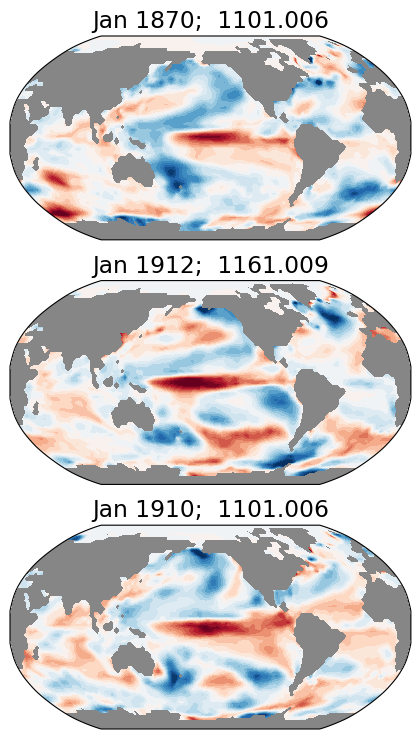

In [66]:
fig, axs = plt.subplots(3,1,figsize=(16/3,3*3),subplot_kw={'projection': ccrs.Robinson(central_longitude=205)})
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ccrc_kwargs = {'transform':ccrs.PlateCarree()}
#fig2 = plt.figure(figsize=(1,1))
#other_ax = plt.axes()
#plt.sca(ax)
lon = ((pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lon-25)%360)+25-360
lat = pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lat

for i in range(0,6,2):
    plt.sca(axs[i//2])
    init = analogues.isel(M=i,Y=ref_y).load()
    plt.contourf(lon,lat,xr.ones_like(pt.mask_dict['10P']),cmap='Greys',vmin=0,vmax=1.8,**ccrc_kwargs
                )
    plt.contourf(lon,lat,small_ss.shift(time=-6).sel(SMILE_M=init.analogue_SMILE_M,time=init.analogue_init_time,var='tos').roll(lon=-10),
                 vmin=-2,vmax=2,levels=[-100]+list(np.linspace(-2,2,25))+[100],cmap='RdBu',**ccrc_kwargs)
    #plt.contour(lon,lat,pt.mask_dict['10P'].roll(lon=-10),levels=(0.5,),colors=('k',),linewidths=(1,),**ccrc_kwargs)
    
    
    plt.title('Jan '+str(int(str(init.analogue_init_time.data)[:4])+1)+';  '+str(init.analogue_SMILE_M.data))
    plt.savefig('figures/snuggleplots/analogues_jan.pdf',transparent=True,bbox_inches='tight')

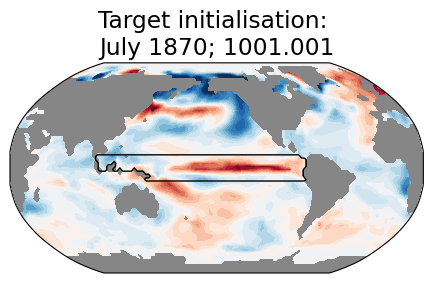

In [65]:
fig, axs = plt.subplots(1,1,figsize=(16/3,3),subplot_kw={'projection': ccrs.Robinson(central_longitude=205)})
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ccrc_kwargs = {'transform':ccrs.PlateCarree()}
#fig2 = plt.figure(figsize=(1,1))
#other_ax = plt.axes()
#plt.sca(ax)
lon = ((pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lon-25)%360)+25-360
lat = pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lat

init = analogues.isel(Y=ref_y).load()
plt.contourf(lon,lat,xr.ones_like(pt.mask_dict['10P']),cmap='Greys',vmin=0,vmax=1.8,**ccrc_kwargs
            )
plt.contourf(lon,lat,small_ss.sel(SMILE_M=init.pred_SMILE_M,time=init.init_time,var='tos').roll(lon=-10),
             vmin=-2,vmax=2,levels=[-100]+list(np.linspace(-2,2,25))+[100],cmap='RdBu',**ccrc_kwargs)
plt.contour(lon,lat,pt.mask_dict['10P'].roll(lon=-10),levels=(0.5,),colors=('k',),linewidths=(1,),**ccrc_kwargs)


plt.title('Target initialisation: \nJuly '+str(init.init_time.data)[:4]+'; '+str(init.pred_SMILE_M.data))
plt.savefig('figures/snuggleplots/target.pdf',transparent=True,bbox_inches='tight')

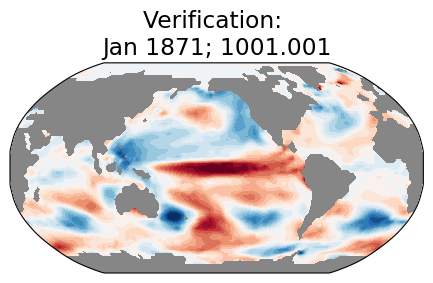

In [64]:
fig, axs = plt.subplots(1,1,figsize=(16/3,4.5),subplot_kw={'projection': ccrs.Robinson(central_longitude=205)})
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ccrc_kwargs = {'transform':ccrs.PlateCarree()}
#fig2 = plt.figure(figsize=(1,1))
#other_ax = plt.axes()
#plt.sca(ax)
lon = ((pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lon-25)%360)+25-360
lat = pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lat

init = analogues.isel(Y=ref_y).load()
plt.contourf(lon,lat,xr.ones_like(pt.mask_dict['10P']),cmap='Greys',vmin=0,vmax=1.8,**ccrc_kwargs
            )
plt.contourf(lon,lat,small_ss.shift(time=-6).sel(SMILE_M=init.pred_SMILE_M,time=init.init_time,var='tos').roll(lon=-10),
             vmin=-2,vmax=2,levels=[-100]+list(np.linspace(-2,2,25))+[100],cmap='RdBu',**ccrc_kwargs)
#plt.contour(lon,lat,pt.mask_dict['10P'].roll(lon=-10),levels=(0.5,),colors=('k',),linewidths=(1,),**ccrc_kwargs)


plt.title('Verification: \nJan '+str(int(str(init.init_time.data)[:4])+1)+'; '+str(init.pred_SMILE_M.data))
plt.savefig('figures/snuggleplots/verification.pdf',transparent=True,bbox_inches='tight')

/glade/derecho/scratch/jjeffree/tmp/ipykernel_693/3847553284.py:4: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 1 Axes> than <Figure size 100x900 with 2 Axes> which fig.colorbar is called on.
  fig.colorbar(cbar,ax=axs,fraction=1,aspect=35,orientation='vertical',extend='both',label='SST anomaly (°C)',shrink=0.8)


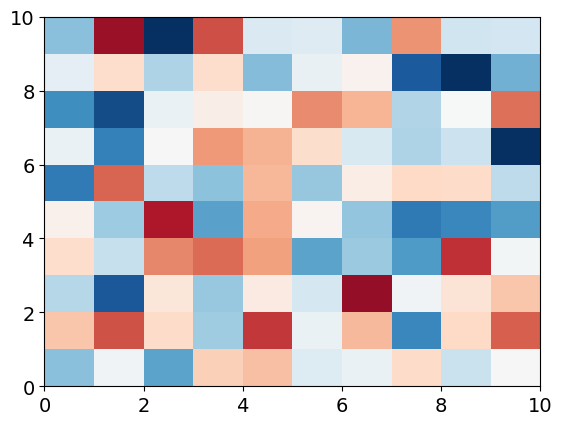

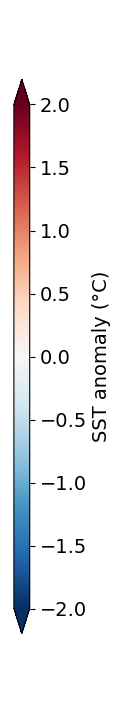

In [5]:
cbar=plt.pcolormesh(np.random.normal(0,1,(10,10)),vmin=-2,vmax=2,cmap='RdBu_r')

fig, axs = plt.subplots(1,1,figsize=(1,3*3))
fig.colorbar(cbar,ax=axs,fraction=1,aspect=35,orientation='vertical',extend='both',label='SST anomaly (°C)',shrink=0.8)
axs.axis('off')
plt.savefig('figures/snuggleplots/colorbar.pdf',transparent=True,bbox_inches='tight')

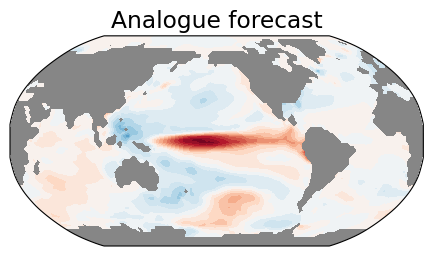

In [62]:
fig, axs = plt.subplots(1,1,figsize=(16/3,4.5),subplot_kw={'projection': ccrs.Robinson(central_longitude=205)})
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ccrc_kwargs = {'transform':ccrs.PlateCarree()}
#fig2 = plt.figure(figsize=(1,1))
#other_ax = plt.axes()
#plt.sca(ax)
lon = ((pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lon-25)%360)+25-360
lat = pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lat


plt.sca(axs)
init = analogues.isel(Y=ref_y).load()
plt.contourf(lon,lat,xr.ones_like(pt.mask_dict['10P']),cmap='Greys',vmin=0,vmax=1.8,**ccrc_kwargs
            )
cbar = plt.contourf(lon,lat,small_ss.shift(time=-6).sel(SMILE_M=init.analogue_SMILE_M,time=init.analogue_init_time,var='tos').roll(lon=-10).mean('M'),
             vmin=-2,vmax=2,levels=[-100]+list(np.linspace(-2,2,25))+[100],cmap='RdBu',**ccrc_kwargs)
#plt.contour(lon,lat,pt.mask_dict['10P'].roll(lon=-10),levels=(0.5,),colors=('k',),linewidths=(1,),**ccrc_kwargs)


plt.title('Analogue forecast')
plt.savefig('figures/snuggleplots/analogue_forecast.pdf',transparent=True,bbox_inches='tight')

In [ ]:
# For georgy
n=32

fig, axs = plt.subplots(n,n,figsize=(8,5),subplot_kw={'projection': ccrs.Robinson(central_longitude=205)})
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ccrc_kwargs = {'transform':ccrs.PlateCarree()}
#fig2 = plt.figure(figsize=(1,1))
#other_ax = plt.axes()
#plt.sca(ax)
lon = ((pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lon-25)%360)+25-360
lat = pt.mask_dict['30P'].roll(lon=-10,roll_coords=True).lat

for i in range(n):
    for j in range(n):
        plt.sca(axs[i,j])
        plotdata = small_ss.isel(SMILE_M=np.random.randint(0,10),time=np.random.randint(0,1200)).sel(var='tos')
        plt.pcolormesh(lon,lat,plotdata.roll(lon=-10),
                     vmin=-2,vmax=2,cmap='RdBu',**ccrc_kwargs)
plt.savefig('figures/dear_georgy.pdf')

In [78]:
small_ss

<xarray.DataArray (var: 2, SMILE_M: 10, time: 1199, lat: 72, lon: 144)> Size: 2GB
array([[[[[            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          ...,
          [-6.33887887e-03, -6.75639987e-03, -6.75972819e-03, ...,
           -6.74524665e-03, -6.80752039e-03, -6.24863744e-03],
          [-7.38565087e-03, -8.00765276e-03, -8.26600432e-03, ...,
           -7.11640716e-03, -7.15851188e-03, -7.26141930e-03],
          [-4.50797677e-03, -4.53762770e-03, -4.67048407e-03, ...,
           -4.26181912e-03, -4.39949274e-03, -4.44159269e-03]],

         [[            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
...
          [ 2.51196628e-02,  2.54976703e-02,  2.58368083e-02, ...,
            2.21611712e-02,  2.36290400e-02,  2.47542682e-02],
          [ 1.82046618e-02,  1.78078242e-02,  1.61070132e-02, ...,
            1.75484210e-02,  1.84012141e-02,  1.75515498e-02],
          [ 8.74523191e-03,  8.95151739e-03,  8.54079618e-03, ...,
            7.56142149e-03,  7.24387655e-03,  7.68390531e-03]],

         [[            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          ...,
          [ 3.28670602e-02,  3.27682389e-02,  3.32709092e-02, ...,
            3.10488862e-02,  3.24585366e-02,  3.25921296e-02],
          [ 2.23656678e-02,  2.15407845e-02,  1.95906388e-02, ...,
            2.16606728e-02,  2.26582040e-02,  2.16190415e-02],
          [ 1.27428605e-02,  1.29523412e-02,  1.23663133e-02, ...,
            1.16581303e-02,  1.11193353e-02,  1.15854508e-02]]]]])
Coordinates:
  * lon      (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 576B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * time     (time) object 10kB 1850-01-01 00:00:00 ... 1949-11-01 00:00:00
  * var      (var) <U3 24B 'tos' 'zos'
  * SMILE_M  (SMILE_M) <U8 320B '1001.001' '1021.002' ... '1161.009' '1181.010'
    month    (time) int64 10kB 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11